In [41]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np

In [42]:
pip install searborn

ERROR: Could not find a version that satisfies the requirement searborn
ERROR: No matching distribution found for searborn
Note: you may need to restart the kernel to use updated packages.


In [43]:
import seaborn as sns

In [44]:
startup = pd.read_csv("50_Startups.csv")

startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


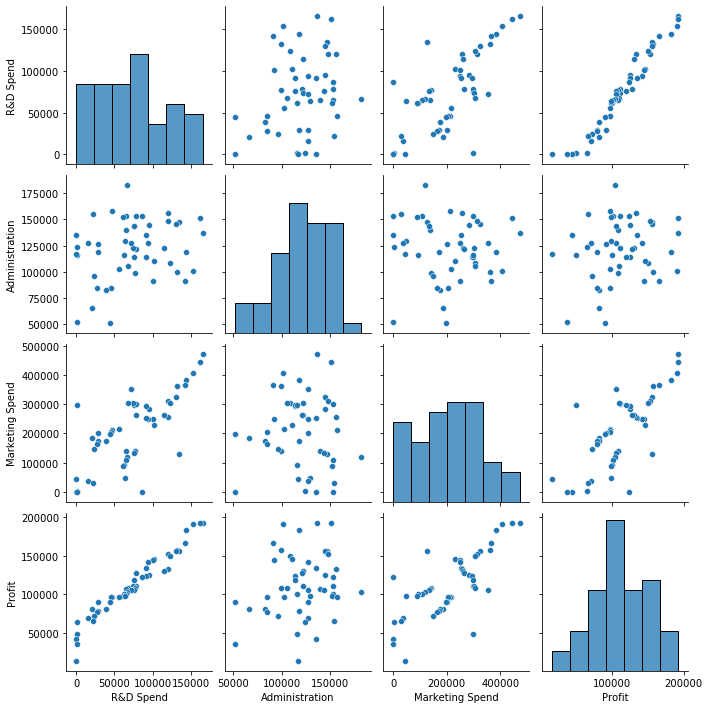

In [45]:
sns.pairplot(data = startup)
plt.show()

In [46]:
x = startup[["R&D Spend","Marketing Spend"]]

x.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [47]:
y = startup[["Profit"]]

y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [49]:
model = linear_model.LinearRegression()

In [50]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
R_sq1 = model.score(x_train, y_train)
R_sq1

0.9478902945455292

In [52]:
model.coef_

array([[0.76989815, 0.02140417]])

In [53]:
model.intercept_

array([51104.17264703])

In [54]:
pd.DataFrame(model.coef_.flatten(), x.columns, columns = ['Coeff'])

,Coeff
R&D Spend,0.769898
Marketing Spend,0.021404


In [55]:
y_pred = model.predict(x_test)

In [56]:
error = y_test - y_pred

error.mean()

Profit   -1832.432277
dtype: float64

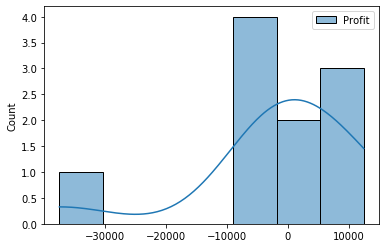

In [57]:
sns.histplot(error, kde = True)
plt.show()

### Now Normalised Data

In [58]:
from sklearn.preprocessing import MinMaxScaler

<function matplotlib.pyplot.show(*args, **kw)>

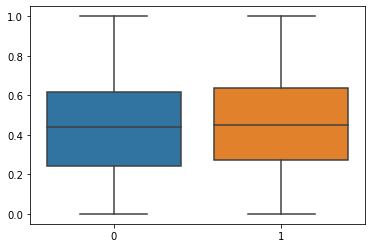

In [59]:
m = MinMaxScaler()

m.fit(x)

x_trans = m.transform(x)

sns.boxplot(data = x_trans)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

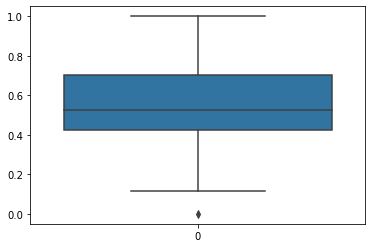

In [60]:
m = MinMaxScaler()

m.fit(y)

y_trans = m.transform(y)

sns.boxplot(data = y_trans)
plt.show

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_trans, y_trans, test_size = 0.2)

In [62]:
model = linear_model.LinearRegression()

In [63]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
R_sq2 = model.score(x_train, y_train)
R_sq2

0.9510874708207963

In [65]:
model.coef_

array([[0.726332  , 0.08770986]])

In [66]:
model.intercept_

array([0.18548426])

In [67]:
pd.DataFrame(model.coef_.flatten(), x.columns, columns =["Coeff"])

,Coeff
R&D Spend,0.726332
Marketing Spend,0.087710


In [68]:
y_pred = model.predict(x_test)

In [69]:
error = y_test - y_pred

error.mean()

-0.0022879426598067048

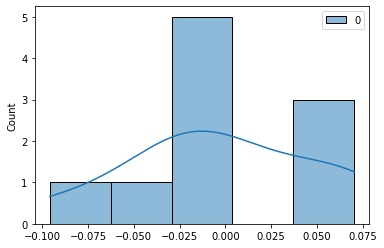

In [70]:
sns.histplot(error, kde = True)
plt.show()

### R Square Table

In [74]:
R_sq ={"R_SQ":[R_sq1,R_sq2]}
R_sq = pd.DataFrame(R_sq, index=("model_1","model_2"))
R_sq

,R_SQ
model_1,0.947890
model_2,0.951087
